In [40]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import pyranges as pr
import itertools
from collections import defaultdict
import os

import sys
sys.path.append("/Genomics/kocherlab/bjarnold/STARRseq/code/notebooks")
import functions as fn



In [41]:
species = "Hlig" # Nmel, Amel, Avir, Apur, Aaur, Bimp, Dmel
# base_dir = "/Genomics/kocherlab/bjarnold/STARRseq/data/meme_suite/sea_output/manually_curated_db_from_beryl"
# base_dir = "/Genomics/kocherlab/bjarnold/STARRseq/data/meme_suite/sea_output/JASPAR2022_CORE_insects_non-redundant_v2"
base_dir = "/Genomics/kocherlab/bjarnold/STARRseq/data/meme_suite/sea_output/fly_factor_survey"

wd = f"{base_dir}/{species}"
number_of_subsamples = 20
eval_thresh = 1
columns = ["RANK","ID","ENR_RATIO", "EVALUE"]

# these files should have all reported TFBSs with E-value <= 10

# dedup_sea_df = pd.read_csv(f'{wd}/dedup/sea.tsv', sep="\t")
# dedup_sea_df = dedup_sea_df[columns]
# dedup_sea_df = dedup_sea_df[dedup_sea_df['EVALUE'] <= eval_thresh].reset_index(drop=True)
# dedup_sea_df = dedup_sea_df[dedup_sea_df["ID"].notna()]
# print(len(dedup_sea_df))


def filter_dfs(dfs, columns, eval_thresh):
    for i,df in enumerate(dfs):
        df = df[columns]
        df = df[df['EVALUE'] <= eval_thresh].reset_index(drop=True)
        df = df[df["ID"].notna()]
        dfs[i] = df
    return dfs



raw_sea_dfs = [pd.read_csv(f'{wd}/raw/rep{i}/sea.tsv', sep="\t") for i in range(number_of_subsamples)]
dedup_sea_dfs = [pd.read_csv(f'{wd}/dedup/rep{i}/sea.tsv', sep="\t") for i in range(number_of_subsamples)]
random_sea_dfs = [pd.read_csv(f'{wd}/random/rep{i}/sea.tsv', sep="\t") for i in range(number_of_subsamples)]

print("before filtering")
[print(len(raw)) for raw in raw_sea_dfs]

raw_sea_dfs = filter_dfs(raw_sea_dfs, columns, eval_thresh)
dedup_sea_dfs = filter_dfs(dedup_sea_dfs, columns, eval_thresh)
random_sea_dfs = filter_dfs(random_sea_dfs, columns, eval_thresh)

print("after filtering")
[print(len(raw)) for raw in raw_sea_dfs]

# for i,raw in enumerate(raw_sea_dfs):
#     raw = raw[columns]
#     raw = raw[raw['EVALUE'] <= eval_thresh].reset_index(drop=True)
#     raw = raw[raw["ID"].notna()]
#     raw_sea_dfs[i] = raw

# print("after filtering")
# [print(len(raw)) for raw in raw_sea_dfs]


# raw_sea_dfs[0]

before filtering
108
93
68
43
75
56
47
110
114
64
98
107
120
62
134
68
123
50
118
115
after filtering
40
31
16
13
22
10
11
31
48
20
38
53
26
11
65
11
52
9
37
51


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

40 40
31 31
16 16
13 13
22 22
10 10
11 11
31 31
48 48
20 20
38 38
53 53
26 26
11 11
65 65
11 11
52 52
9 9
37 37
51 51
13 13
17 17
11 11
13 13
46 46
7 7
22 22
17 17
16 16
19 19
22 22
18 18
12 12
13 13
9 9
19 19
18 18
13 13
16 16
9 9
4 4
5 5
8 8
1 1
1 1
8 8
6 6
1 1
4 4
1 1
8 8
5 5
4 4
6 6
6 6
3 3
7 7
6 6
8 8
8 8


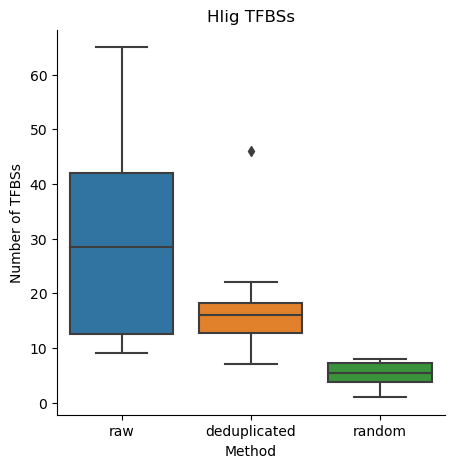

In [42]:
def get_num_TFBSs(dfs):
    TFBS = []
    TFBS_num = []
    for df in dfs:
        print(len(df), len(set(df["ID"].unique())))
        tfbs = set(df["ID"].unique())
        TFBS.append(tfbs)
        TFBS_num.append(len(tfbs))
    
    return TFBS_num

results = defaultdict(list)
results['raw'] = get_num_TFBSs(raw_sea_dfs)
results['deduplicated'] = get_num_TFBSs(dedup_sea_dfs)
results['random'] = get_num_TFBSs(random_sea_dfs)


results_df = pd.DataFrame.from_dict(results)

# make boxplot of number of TFBSs
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data=results_df, ax=ax)
ax.set_ylabel("Number of TFBSs")
ax.set_xlabel("Method")
ax.set_title(f"{species} TFBSs")
sns.despine()
